In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src"))  
from pos_analyse_mt import evaluate_pos

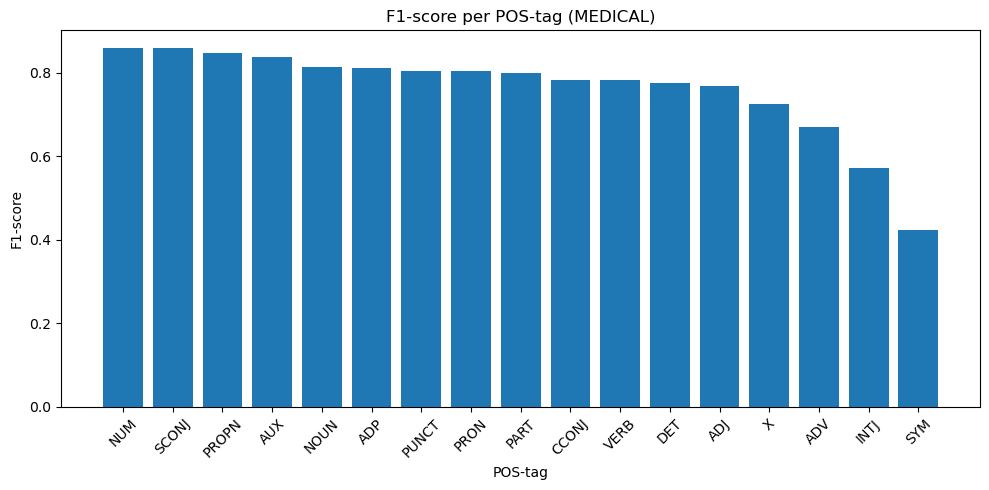

,POS,Precision,Recall,F1,Support
8,NUM,0.847458,0.869565,0.858369,460
13,SCONJ,0.844262,0.872881,0.858333,118
11,PROPN,0.843323,0.852285,0.847780,941
3,AUX,0.844125,0.830189,0.837099,424
7,NOUN,0.811831,0.815424,0.813623,1582
1,ADP,0.808132,0.812261,0.810191,783
12,PUNCT,0.814516,0.795276,0.804781,127
10,PRON,0.823529,0.785047,0.803828,214
9,PART,0.811881,0.788462,0.800000,104
4,CCONJ,0.785366,0.777778,0.781553,207


In [3]:
df_medical = evaluate_pos(
    "/Users/sedatgunay/Desktop/MT-DATA/data/medical/test.en.tag",
    "/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_medical_knn_4k_100T_8e-1lambda_beam5/hyp.eval_ready.tag",
    domain_name="MEDICAL"
)

df_medical
df_medical.to_csv("results/pos_medical_scores.csv", index=False)
df_medical

In [7]:
!sacrebleu /Users/sedatgunay/Desktop/MT-DATA/data/medical/test.en \
    -i /Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_medical_knn_4k_100T_8e-1lambda_beam5/de-en.checkpoint_last.test.translation_knn.beam-5..hyp.eval_ready\
    -m bleu -b -w 2 --sentence-level \
    > results/bleu_scores_medical.txt

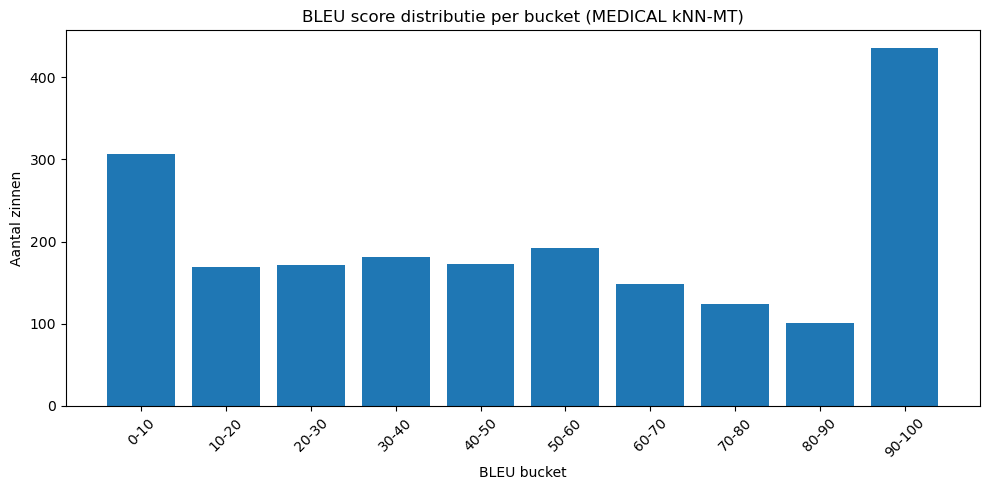

In [8]:
from analysis import analyze_bleu_buckets_single_system

bleu_medical = analyze_bleu_buckets_single_system("results/bleu_scores_medical.txt", system_name="MEDICAL kNN-MT")

In [11]:
import pandas as pd

# Laad BLEU-scores
with open("results/bleu_scores_medical.txt") as f:
    scores = [float(line.strip()) for line in f]

# Vind indices van de laagste 5% (BLEU-outliers)
n = int(len(scores) * 0.05)
low_idx = sorted(range(len(scores)), key=lambda i: scores[i])[:n]

In [12]:
with open("/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_medical_knn_4k_100T_8e-1lambda_beam5/de-en.checkpoint_last.test.translation_knn.beam-5..hyp.eval_ready") as f:
    hyps = [line.strip() for line in f]
with open("/Users/sedatgunay/Desktop/MT-DATA/data/medical/test.en") as f:
    refs = [line.strip() for line in f]

for i in low_idx:
    print(f"[{i}]")
    print("REF:", refs[i])
    print("HYP:", hyps[i])
    print("BLEU:", scores[i])
    print()

[35]
REF: Confusion and disorientation Anxiety reaction Abnormal dreams Depression Hallucinations
HYP: Dizziness Sleep disorders Taste disorders
BLEU: 0.0

[52]
REF: Glaxo Group UK
HYP: 33.0
BLEU: 0.0

[69]
REF: Susceptibility
HYP: N.gonorrhoea
BLEU: 0.0

[71]
REF: Core SPC for Human plasma derived and recombinant coagulation factor VIII products Adopted June 2000
HYP: (32-2) 552 22 11
BLEU: 0.0

[78]
REF: Simvastatin Lovastatin
HYP: HMG-CoA reductase inhibitors simvastatin lovastatin
BLEU: 0.0

[82]
REF: Flushing
HYP: Eye pain,
BLEU: 0.0

[87]
REF: Film-coated tablet
HYP: 50 mg losartan potassium - Filmtablet 12,5 mg hydrochlorothiazide
BLEU: 0.0

[98]
REF: blood pressure dropping heart beating fast
HYP: Rapid heartbeat
BLEU: 0.0

[101]
REF: 8.4 0.5 8.0
HYP: 12.8
BLEU: 0.0

[107]
REF: Where
HYP: - it has not been demonstrated that CYSTAGON is an accumulation of cystine crystals in the eye.
BLEU: 0.0

[130]
REF: 0.21*
HYP: 0.
BLEU: 0.0

[137]
REF: If your liver or kidneys do not functi

In [13]:
import pandas as pd

# Laad scores
with open("results/bleu_scores_medical.txt") as f:
    scores = [float(line.strip()) for line in f]

# Laad POS-tags
with open("/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_medical_knn_4k_100T_8e-1lambda_beam5/hyp.eval_ready.tag") as f:
    tags = [line.strip().split() for line in f]

# Selecteer laagste 5% indexen
n = int(len(scores) * 0.05)
outlier_idx = sorted(range(len(scores)), key=lambda i: scores[i])[:n]

# Verzamel POS-tags van outliers
outlier_tags = [tags[i] for i in outlier_idx]
flat_tags = [tag for line in outlier_tags for tag in line]

# tags = lijst met lijstjes van POS per zin (al geladen bij stap 1)
all_flat_tags = [tag for line in tags for tag in line]

In [14]:
from collections import Counter

tag_counts = Counter(flat_tags)
df_pos_outliers = pd.DataFrame(tag_counts.items(), columns=["POS", "Count"])
df_pos_outliers = df_pos_outliers.sort_values(by="Count", ascending=False)
print(df_pos_outliers)

      POS  Count
1    NOUN    122
0   PROPN     86
2     NUM     69
4     ADP     46
7     ADJ     31
5    VERB     28
12    DET     25
6     ADV     16
9     AUX     14
3   PUNCT     13
15  CCONJ     10
10   PART      7
14   INTJ      4
8    PRON      4
13      X      4
11  SCONJ      4
16    SYM      2


In [17]:
total_counts = Counter(all_flat_tags)
df_total = pd.DataFrame(total_counts.items(), columns=["POS", "Total"])

In [18]:
df_outlier = pd.DataFrame(Counter(flat_tags).items(), columns=["POS", "Outlier"])
df_merged = df_outlier.merge(df_total, on="POS")

# Voeg percentage kolom toe
df_merged["Outlier %"] = 100 * df_merged["Outlier"] / df_merged["Total"]

# Sorteer op relatieve oververtegenwoordiging
df_merged = df_merged.sort_values(by="Outlier %", ascending=False)

df_merged

,POS,Outlier,Total,Outlier %
14,INTJ,4,68,5.882353
2,NUM,69,2408,2.865449
6,ADV,16,577,2.772964
13,X,4,165,2.424242
3,PUNCT,13,545,2.385321
0,PROPN,86,3673,2.341410
10,PART,7,422,1.658768
1,NOUN,122,7371,1.655135
7,ADJ,31,2425,1.278351
12,DET,25,2078,1.203080
